In [1]:
!kaggle datasets download -d debayan20000/flooddetection-dataset

Dataset URL: https://www.kaggle.com/datasets/debayan20000/flooddetection-dataset
License(s): unknown
100%|█████████████████████████████████████▊| 3.64G/3.66G [00:39<00:00, 64.7MB/s]
100%|██████████████████████████████████████| 3.66G/3.66G [00:39<00:00, 98.7MB/s]


In [2]:
import zipfile
import os

def unzip_file(zip_filepath, dest_dir):
    """
    Unzips a .zip file to the specified destination directory.

    Parameters:
    zip_filepath (str): The path to the .zip file.
    dest_dir (str): The directory where the contents will be extracted.
    """
    # Ensure the destination directory exists
    os.makedirs(dest_dir, exist_ok=True)

    # Open the zip file
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        # Extract all the contents to the destination directory
        zip_ref.extractall(dest_dir)
    print(f"Unzipped {zip_filepath} to {dest_dir}")

# Example usage
zip_filepath = '/kaggle/working/flooddetection-dataset.zip'
dest_dir = '/kaggle/working'
unzip_file(zip_filepath, dest_dir)


Unzipped /kaggle/working/flooddetection-dataset.zip to /kaggle/working


In [3]:
!pip install rasterio

In [4]:
import os
import rasterio

def delete_mismatched_files(img_dir, label_dir):
    # Get the list of image and label filenames
    img_files = set(os.listdir(img_dir))
    label_files = set(os.listdir(label_dir))
    
    # Find mismatched files
    mismatched_img_files = img_files - label_files
    mismatched_label_files = label_files - img_files
    
    # Delete mismatched image files
    for img_file in mismatched_img_files:
        img_path = os.path.join(img_dir, img_file)
        with rasterio.open(img_path, 'r') as src:
            print(f'Deleting mismatched image file: {img_path}')
            os.remove(img_path)
    
    # Delete mismatched label files
    for label_file in mismatched_label_files:
        label_path = os.path.join(label_dir, label_file)
        with rasterio.open(label_path, 'r') as src:
            print(f'Deleting mismatched label file: {label_path}')
            os.remove(label_path)

# Example usage
img_directory1 = '/kaggle/working/Houston-20240711T175032Z-001/Houston/img/train'  # Replace with the path to your img directory
label_directory1 = '/kaggle/working/Houston-20240711T175032Z-001/Houston/lbl/train'  # Replace with the path to your labels directory
img_directory2 = '/kaggle/working/Houston-20240711T175032Z-001/Houston/img/valid'  # Replace with the path to your img directory
label_directory2 = '/kaggle/working/Houston-20240711T175032Z-001/Houston/lbl/valid'  # Replace with the path to your labels directory
img_directory3 = '/kaggle/working/Calgary-20240711T175032Z-002/Calgary/img/train'  # Replace with the path to your img directory
label_directory3 = '//kaggle/working/Calgary-20240711T175032Z-002/Calgary/lbl/train'  # Replace with the path to your labels directory
img_directory4 = '/kaggle/working/Calgary-20240711T175032Z-002/Calgary/img/valid'  # Replace with the path to your img directory
label_directory4 = '/kaggle/working/Calgary-20240711T175032Z-002/Calgary/lbl/valid'  # Replace with the path to your labels directory

delete_mismatched_files(img_directory1, label_directory1)
delete_mismatched_files(img_directory2, label_directory2)
delete_mismatched_files(img_directory3, label_directory3)
delete_mismatched_files(img_directory4, label_directory4)



/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_132_003_003.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_065_000_002.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_094_002_002.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_158_002_003.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_083_002_000.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_070_001_000.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_159_001_003.tif
Deleting mismatched image file: /kaggle/working/Houston-20240711T175032Z-001/Houston/img/train/huston_062_001_003.tif
Deleting mismatched image file: /kaggle/working/Houston-

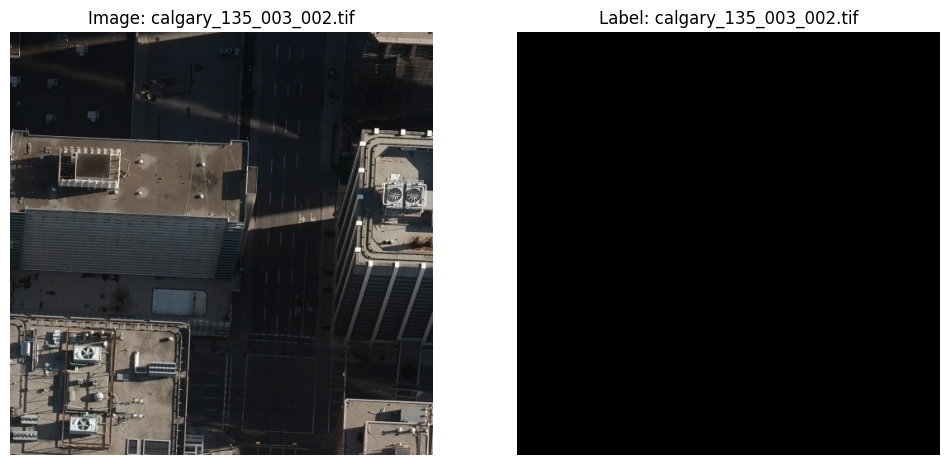

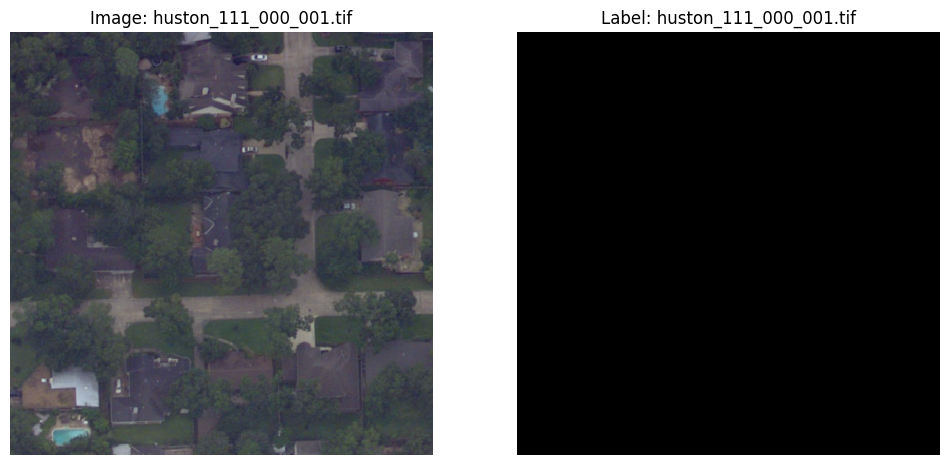

In [5]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def visualize_image_and_label(img_dir, lbl_dir, idx=0):
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.tif')]
    img_path = os.path.join(img_dir, img_files[idx])
    lbl_path = os.path.join(lbl_dir, img_files[idx])

    with rasterio.open(img_path) as src:
        image = src.read([1, 2, 3])
        image = np.moveaxis(image, 0, -1)  # Convert from (C, H, W) to (H, W, C)

    with rasterio.open(lbl_path) as src:
        label = src.read(1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image)
    axes[0].set_title(f'Image: {img_files[idx]}')
    axes[0].axis('off')

    axes[1].imshow(label, cmap='gray')
    axes[1].set_title(f'Label: {img_files[idx]}')
    axes[1].axis('off')

    plt.show()

# Directories for Calgary dataset
calgary_img_dir = '/kaggle/working/Calgary-20240711T175032Z-002/Calgary/img/train'
calgary_lbl_dir = '/kaggle/working/Calgary-20240711T175032Z-002/Calgary/lbl/train'

# Directories for Houston dataset
houston_img_dir = '/kaggle/working/Houston-20240711T175032Z-001/Houston/img/train'
houston_lbl_dir = '/kaggle/working/Houston-20240711T175032Z-001/Houston/lbl/train'

# Visualize the first image and label for Calgary
visualize_image_and_label(calgary_img_dir, calgary_lbl_dir, idx=0)

# Visualize the first image and label for Houston
visualize_image_and_label(houston_img_dir, houston_lbl_dir, idx=0)

In [9]:
import warnings
from rasterio.errors import NotGeoreferencedWarning

# Suppress NotGeoreferencedWarning
warnings.simplefilter("ignore", NotGeoreferencedWarning)
warnings.simplefilter("ignore", UserWarning)  # Optionally suppress other warnings

import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import rasterio
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Define paths
base_dir = '/kaggle/working/'
cities = ['Calgary-20240711T175032Z-002/Calgary', 'Houston-20240711T175032Z-001/Houston']
categories = ['img', 'lbl']
splits = ['train', 'valid', 'test']

# Custom Dataset
class FloodDataset(Dataset):
    def __init__(self, img_folder, lbl_folder, transform=None):
        self.img_folder = img_folder
        self.lbl_folder = lbl_folder
        self.img_files = sorted([f for f in os.listdir(img_folder) if f.endswith('.tif')])
        self.lbl_files = sorted([f for f in os.listdir(lbl_folder) if f.endswith('.tif')])
        self.transform = transform

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_folder, self.img_files[idx])
        lbl_path = os.path.join(self.lbl_folder, self.lbl_files[idx])

        with rasterio.open(img_path) as src:
            img = src.read().astype(np.float32)  # Read all channels

        with rasterio.open(lbl_path) as src:
            lbl = src.read(1).astype(np.float32)  # Assuming label is single-channel

        # Check the number of channels and handle single-channel images
        if img.shape[0] == 1:
            img = np.repeat(img, 3, axis=0)  # Repeat to make it 3-channel
        elif img.shape[0] > 3:
            img = img[:3, :, :]  # Select the first 3 channels if there are more

        img = np.transpose(img, (1, 2, 0))  # Change to HWC format

        if self.transform:
            img = self.transform(img)
            lbl = self.transform(lbl)

        return img, lbl

# DataLoader function
def get_dataloader(dataset, split, transform=None, batch_size=8, num_workers=4):
    image_dir = os.path.join(base_dir, dataset, 'img', split)
    label_dir = os.path.join(base_dir, dataset, 'lbl', split)
    dataset = FloodDataset(image_dir, label_dir, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=(split == 'train'), num_workers=num_workers)
    return dataloader

# Define the UNet model (simplified version)
class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.encoder1 = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.encoder2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.middle = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        self.up2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder2 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        self.up1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.decoder1 = nn.Sequential(
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )

        self.final = nn.Conv2d(32, out_channels, kernel_size=1)

    def forward(self, x):
        x1 = self.encoder1(x)
        x2 = self.pool1(x1)

        x3 = self.encoder2(x2)
        x4 = self.pool2(x3)

        x5 = self.middle(x4)

        x6 = self.up2(x5)
        x7 = torch.cat([x3, x6], dim=1)
        x8 = self.decoder2(x7)

        x9 = self.up1(x8)
        x10 = torch.cat([x1, x9], dim=1)
        x11 = self.decoder1(x10)

        output = self.final(x11)
        return output

# Training function with accuracy and early stopping
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=150, patience=3, model_save_dir='/kaggle/working/models'):
    model.to(device)
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device).float()
                labels = labels.to(device).float()
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    preds = torch.sigmoid(outputs) > 0.5
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / (len(dataloaders[phase].dataset) * np.prod(labels.shape[1:]))

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'valid':
                scheduler.step(epoch_loss)

                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    patience_counter = 0
                    best_model_wts = model.state_dict()

                    # Create directory if it doesn't exist
                    model_dir = os.path.join(model_save_dir, dataset.lower().replace(' ', '_'))
                    os.makedirs(model_dir, exist_ok=True)

                    # Save best model
                    model_path = os.path.join(model_dir, f'trained_unet_model_Huston.pth')
                    torch.save(model.state_dict(), model_path)
                    print(f"Model saved to '{model_path}'")
                else:
                    patience_counter += 1

                # Early stopping
                if patience_counter >= patience:
                    print("Early stopping triggered.")
                    break

    model.load_state_dict(best_model_wts)
    return model

# Define a function to save the model
def save_model(model, path):
    torch.save(model.state_dict(), path)

# Main execution
if __name__ == "__main__":
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    datasets = ['Houston-20240711T175032Z-001/Houston']
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    for dataset in datasets:
        dataloaders = {split: get_dataloader(dataset, split, transform=transform, batch_size=4, num_workers=2) for split in ['train', 'valid']}
        model = UNet(in_channels=3, out_channels=1)  # Ensure in_channels matches the number of channels in your input data
        criterion = nn.BCEWithLogitsLoss()  # Adjust loss function according to your problem
        optimizer = optim.Adam(model.parameters(), lr=0.00001)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)

        print(f"Training model for {dataset} dataset...")
        model = train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=150, patience=3)


Using device: cuda
Training model for Houston-20240711T175032Z-001/Houston dataset...
Epoch 0/149
----------
train Loss: 0.5527 Acc: 0.7574
valid Loss: 0.4379 Acc: 0.8919
Model saved to '/kaggle/working/models/houston-20240711t175032z-001/houston/trained_unet_model_Huston.pth'
Epoch 1/149
----------
train Loss: 0.4238 Acc: 0.8873
valid Loss: 0.3903 Acc: 0.8955
Model saved to '/kaggle/working/models/houston-20240711t175032z-001/houston/trained_unet_model_Huston.pth'
Epoch 2/149
----------
train Loss: 0.3825 Acc: 0.8886
valid Loss: 0.3595 Acc: 0.8957
Model saved to '/kaggle/working/models/houston-20240711t175032z-001/houston/trained_unet_model_Huston.pth'
Epoch 3/149
----------
train Loss: 0.3238 Acc: 0.8888
valid Loss: 0.2733 Acc: 0.8957
Model saved to '/kaggle/working/models/houston-20240711t175032z-001/houston/trained_unet_model_Huston.pth'
Epoch 4/149
----------
train Loss: 0.2647 Acc: 0.8890
valid Loss: 0.2360 Acc: 0.8989
Model saved to '/kaggle/working/models/houston-20240711t17503